<a href="https://colab.research.google.com/github/DenizGuelcicek/SA/blob/master/LTSM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [13]:
df = pd.read_csv("TSLA.csv")
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1255,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
1256,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
1257,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500
1258,2020-07-09,279.398010,281.712006,270.256012,278.855988,278.855988,58588000


In [8]:
print("Number of rows and columns:", df.shape)


Number of rows and columns: (1259, 7)


In [9]:
#split the data into training and test sets 
##target value = Close stock price 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [10]:
#normalize the data 
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [12]:
#Build the LSTM with 50 neurons and 4 hidden layers. 
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 10s 124ms/step - loss: 0.0633
Epoch 2/100
24/24 [==============================] - 3s 127ms/step - loss: 0.0165
Epoch 3/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0149
Epoch 4/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0133
Epoch 5/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0120
Epoch 6/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0113
Epoch 7/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0129
Epoch 8/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0118
Epoch 9/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0104
Epoch 10/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0102
Epoch 11/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0096
Epoch 12/100
24/24 [==============================] - 3s 128ms/step - loss: 0.0089
Epoch 13/100

In [14]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [15]:
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

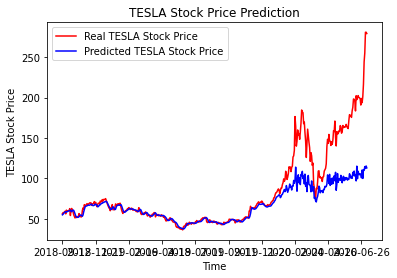

In [19]:
#visualize the results
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()